# Kaggle Heart Disease Classification
This notebook represents my data analysis and machine learning classification work for the Heart Disease UCI competition on Kaggle. It is linked here: https://www.kaggle.com/ronitf/heart-disease-uci 

This project's target variable is a 1/0 boolean indicator on if an individual has heart disease or not. As such, that is what I'll be predicting in this notebook. Since this is not a true Kaggle competition, but rather a public dataset, I will not be able to score myself against other individuals. Instead, I will use this as an opportunity to utilize the sklearn library to quickly put together predictions using a variety of models which will be compared and contrasted to help determine success.

## Environment Setup

In [1]:
# Python package importing 
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing as skpp
from sklearn import metrics

In [2]:
# Global variable declaration
source_csv_file_path = 'C:\\Users\\vandy\\OneDrive\\Documents\\GitHub\\Kaggle_heart_dis_prediction\\data\\heart.csv'

## Data Import
Here we get our first look at the dataset we will be working with. 

In [3]:
# Source data import into frame
heart_frame = pd.read_csv(source_csv_file_path)

# Frame dimensions
print('The number of columns in the dataset: ', heart_frame.shape[1])
print('The number of rows in the dataset: ', heart_frame.shape[0])

The number of columns in the dataset:  14
The number of rows in the dataset:  303


In [4]:
# Frame print out
heart_frame[0:20].style

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


We see this is a relatively narrow and short dataset, meaning that this should be a relatively simple model and that overfitting will be easy to encounter. Ideally in an actual medical implementation, more rows would be desired to allow for a more accurate model and provide additional testing data.

## Data Quality Checks

In [5]:
heart_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Nulls
heart_frame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Column data types
heart_frame.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# Duplicate checks
duplicateRowsDF = heart_frame[heart_frame.duplicated()]
duplicateRowsDF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<AxesSubplot:>

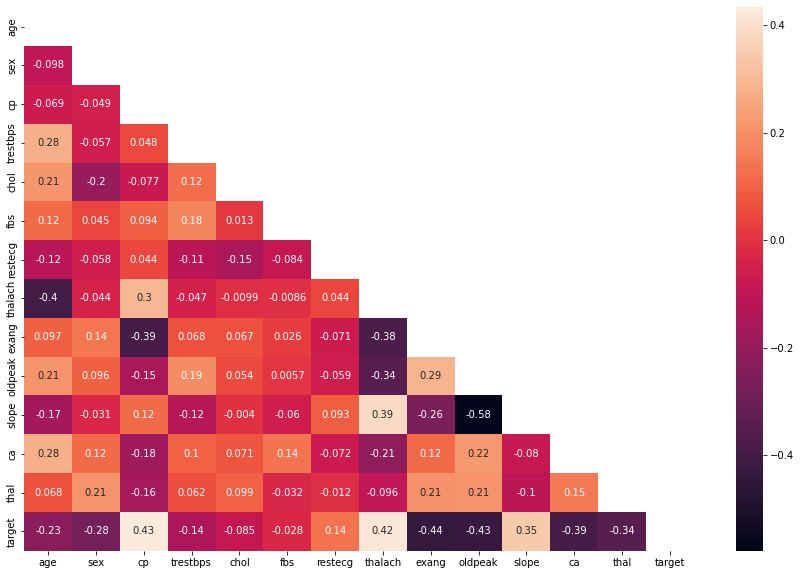

In [9]:
mask = np.triu(np.ones_like(heart_frame.corr()))
fig=plt.figure(figsize=(15,10))
sb.heatmap(heart_frame.corr(), annot=True, mask=mask)

After performing data quality checks, it becomes apparently why this dataset is popular amongst ML engineers due to its cleanliness. It is apparent this set doesn't have any missing values, almost no duplicates, and relatively low correlation amongst the features. Fortunately, this means that there will not be a large amount of data preprocessing needed before machine learning predictions can be made.

## Exploratory Data Analysis

To build on top of the above quality checks, some amount of visual exploration into the data is necessary to ensure full understanding of the data and that no major data preprocessing nor feature engineering is necessary.

[Text(0.5, 1.0, 'Age Distribution')]

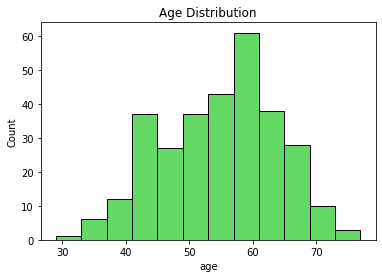

In [10]:
sb.histplot(heart_frame['age'], color='limegreen').set(title='Age Distribution')

[Text(0.5, 1.0, 'Sex Distribution')]

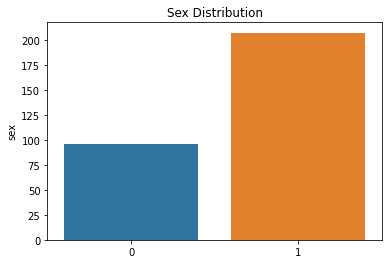

In [11]:
# note that sex distribution is biased
target_counts = heart_frame['sex'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Sex Distribution')

[Text(0.5, 1.0, 'Chest Pain Distribution')]

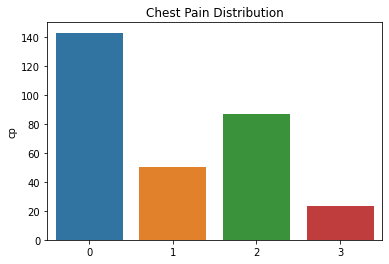

In [12]:
target_counts = heart_frame['cp'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Chest Pain Distribution')

[Text(0.5, 1.0, 'Resting BP Distribution')]

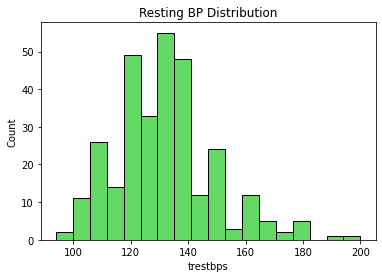

In [13]:
sb.histplot(heart_frame['trestbps'], color='limegreen').set(title='Resting BP Distribution')

[Text(0.5, 1.0, 'Serum Cholestoral Distribution')]

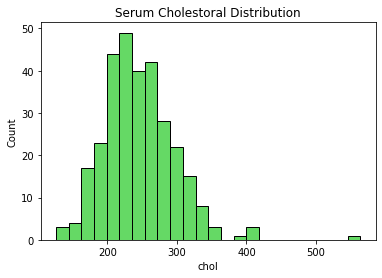

In [14]:
sb.histplot(heart_frame['chol'], color='limegreen').set(title='Serum Cholestoral Distribution')

[Text(0.5, 1.0, 'Fasting Blood Sugar > 120 mg/dL Distribution')]

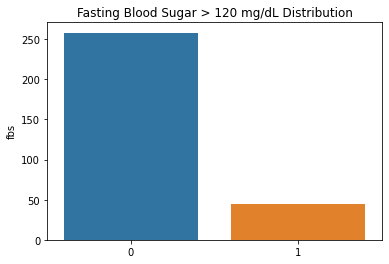

In [15]:
target_counts = heart_frame['fbs'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Fasting Blood Sugar > 120 mg/dL Distribution')

[Text(0.5, 1.0, 'Resting Cardiograph Results')]

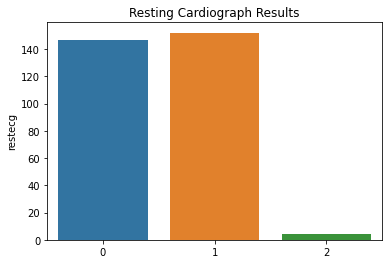

In [16]:
target_counts = heart_frame['restecg'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Resting Cardiograph Results')

[Text(0.5, 1.0, 'Max Heart Rate Distribution')]

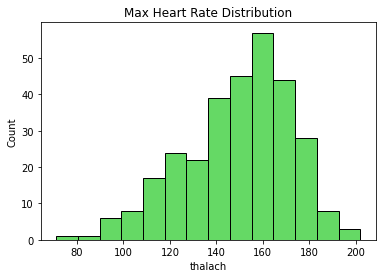

In [17]:
sb.histplot(heart_frame['thalach'], color='limegreen').set(title='Max Heart Rate Distribution')

[Text(0.5, 1.0, 'Exercised Induced Angina Distribution')]

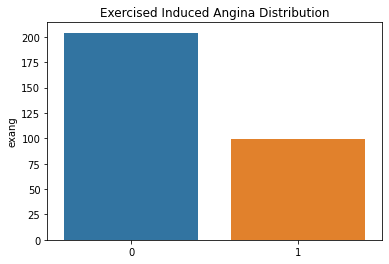

In [18]:
target_counts = heart_frame['exang'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Exercised Induced Angina Distribution')

[Text(0.5, 1.0, 'Oldpeak Distribution')]

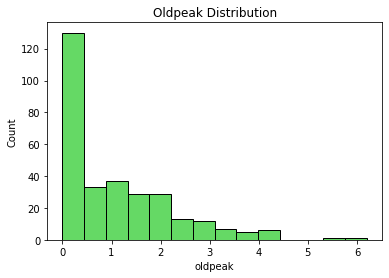

In [19]:
sb.histplot(heart_frame['oldpeak'], color='limegreen').set(title='Oldpeak Distribution')

[Text(0.5, 1.0, 'ST Slope Distribution')]

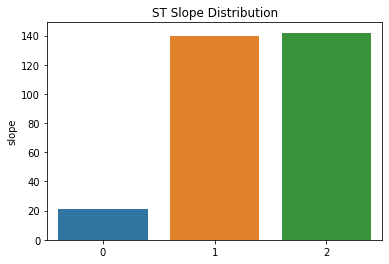

In [20]:
target_counts = heart_frame['slope'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='ST Slope Distribution')

[Text(0.5, 1.0, 'Major Vessel Count Distribution')]

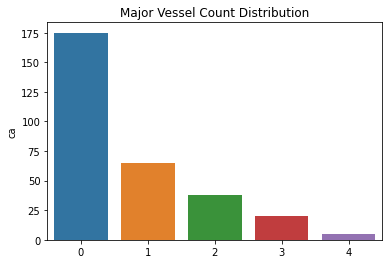

In [21]:
target_counts = heart_frame['ca'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Major Vessel Count Distribution')

[Text(0.5, 1.0, 'Thal Distribution')]

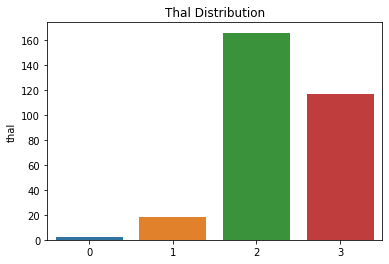

In [22]:
target_counts = heart_frame['thal'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Thal Distribution')

[Text(0.5, 1.0, 'Target Distribution')]

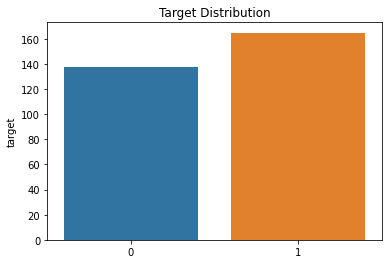

In [23]:
target_counts = heart_frame['target'].value_counts()
sb.barplot(x=target_counts.index, y=target_counts).set(title='Target Distribution')

Here we see an interesting blend of normally distributed and skewed and imbalanced features. Note that it seems the categorical features are particularly imbalanced. Fortunately, the target variable is reasonably balanced. As such, machine learning work can proceed accurately with some data scaling and one-hot encoding of the categorical (and non-binary) features.

## Data Preprocessing

In [24]:
# OH encoding!
ohe = OneHotEncoder(handle_unknown='ignore')

encoded_df = pd.DataFrame(ohe.fit_transform(heart_frame[['cp',  'restecg', 'slope', 'ca', 'thal']]).toarray())
encoded_df.columns = ohe.get_feature_names_out(['cp',  'restecg', 'slope', 'ca', 'thal'])

# merge one-hot encoded columns back with df
temp_df = heart_frame.join(encoded_df)
temp_df.drop(['cp',  'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)
heart_frame = temp_df
temp_df = None

#view encoded df
heart_frame[0:20].style

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.300000,1,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,37,1,130,250,0,187,0,3.500000,1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,41,0,130,204,0,172,0,1.400000,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,56,1,120,236,0,178,0,0.800000,1,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,57,0,120,354,0,163,1,0.600000,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
5,57,1,140,192,0,148,0,0.400000,1,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
6,56,0,140,294,0,153,0,1.300000,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
7,44,1,120,263,0,173,0,0.000000,1,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
8,52,1,172,199,1,162,0,0.500000,1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,57,1,150,168,0,174,0,1.600000,1,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [25]:
# train test split
y = heart_frame['target']
X = heart_frame.loc[:, heart_frame.columns != 'target']

X_scaled = skpp.StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=72)

With the aformentioned one-hot encoding and scaling complete, as well as a test-train split of our given dataset, we are ready to begin making predictions on the data.

## Begin Machine Learning
The main purpose of this notebook is to utilize a wide variety of algorithms and compare them, and that process will follow in the below section.

In [26]:
# create logistic regression object
lr = LogisticRegression(random_state = 7)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=7)

In [27]:
y_prob = lr.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [28]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[22,  1],
       [ 5, 33]], dtype=int64)

((22 + 33) / (5 + 1 + 21 + 33)) x 100 = **91.67%** accuracy from the **logistic regression** model.

In [29]:
lrcv = LogisticRegressionCV(random_state = 7)
lrcv.fit(X_train, Y_train)

LogisticRegressionCV(random_state=7)

In [30]:
y_prob = lrcv.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [31]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[22,  1],
       [ 8, 30]], dtype=int64)

((22 + 30) / (8 + 1 + 22 + 30)) x 100 = **85.25%** accuracy from the **logistic regression with cross validation** model.

In [32]:
rcv = RidgeClassifierCV()
rcv.fit(X_train, Y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))

In [33]:
y_pred = rcv.predict(X_test)

In [34]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[21,  2],
       [ 7, 31]], dtype=int64)

((21 + 31) / (7 + 2 + 21 + 31)) x 100 = **85.25%** accuracy from the **ridge regression with cross validation** model.

In [35]:
sgdc = SGDClassifier(random_state = 7)
sgdc.fit(X_train, Y_train)

SGDClassifier(random_state=7)

In [36]:
y_pred = sgdc.predict(X_test)

In [37]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix 

array([[18,  5],
       [14, 24]], dtype=int64)

((18 + 24) / (14 + 5 + 18 + 24)) x 100 = **68.85%** accuracy from the **stochastic gradient descent classifier** model.

For K nearest neighbors, we will run multiple models to determine the most accurate value of K to use.

In [38]:
knn_vals = []
for i in range(1,26):
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, Y_train)
    knn_vals.append(knc.score(X_test, Y_test))

Text(0.5, 1.0, 'K vs Accuracy Scores')

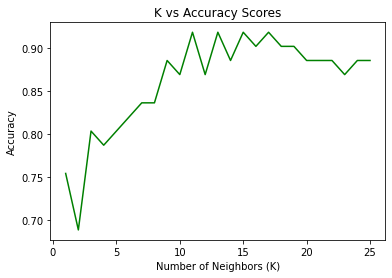

In [39]:
plt.plot([i for i in range(1,26)], knn_vals, color='green')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy Scores')

It appears the most accurate value of K is 11!

In [40]:
knc = KNeighborsClassifier(n_neighbors = 11)
knc.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [41]:
y_pred = knc.predict(X_test)

In [42]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix 

array([[22,  1],
       [ 4, 34]], dtype=int64)

((22 + 34) / (4 + 1 + 22 + 34)) x 100 = **91.8%** accuracy from the **k nearest neighbors** model.

In [43]:
svc = SVC(random_state = 7)
svc.fit(X_train, Y_train)

SVC(random_state=7)

In [44]:
y_pred = svc.predict(X_test)

In [45]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix 

array([[21,  2],
       [ 8, 30]], dtype=int64)

((21 + 30) x (8 + 2 + 21 + 30)) x 100 = **83.61%** accuracy from the **support vector classifier** model.

Similarly to KNN, with the decision tree classifier model multiple runs will be done to determine the most accurate number of features to be used.

In [46]:
tree_vals = []
for i in range(1, len(X.columns) + 1):
    dtc = DecisionTreeClassifier(max_features = i, random_state = 1)
    dtc.fit(X_train, Y_train)
    tree_vals.append(dtc.score(X_test, Y_test))

Text(0.5, 1.0, 'Feature Limit vs Accuracy Scores')

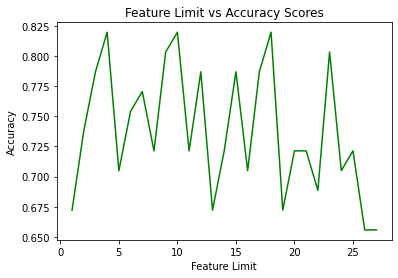

In [47]:
plt.plot([i for i in range(1, len(X.columns) + 1)], tree_vals, color='green')
plt.xlabel('Feature Limit')
plt.ylabel('Accuracy')
plt.title('Feature Limit vs Accuracy Scores')

Per the above visual, our desired number of features to limit is 3!

In [48]:
dtc = DecisionTreeClassifier(max_features = 3, random_state = 7)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_features=3, random_state=7)

In [49]:
y_pred = dtc.predict(X_test)

In [50]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix

array([[17,  6],
       [10, 28]], dtype=int64)

((17 + 28) / (6 + 10 + 17 + 28)) x 100 = **73.77%** accuracy from the **decision tree** model.

In [51]:
rfc = RandomForestClassifier(random_state = 7)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=7)

In [52]:
y_pred = rfc.predict(X_test)

In [53]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
confusion_matrix 

array([[21,  2],
       [ 8, 30]], dtype=int64)

((21 + 30) / (8 + 2 + 21 + 30)) x 100 = **83.61%** accuracy from the **random forest classifier** model.

## In Conclusion

The Heart Disease UCI dataset on Kaggle is popular amongst ML engineers, and this notebook shows that it is with good reason this is the case. While being a relatively clean dataset, it still allowed the opportunity to implement data scaling as well as encoding plus it afforded the always enriching chance at exploratory data analysis. Additionally, the data provided a good base with which to compare various algorithms offered by the highly capable sklearn library. In the end, it seems that the logistic regression and k-nearest neighbors algorithms were most accurate. Given the healthcare diagnostic use case this dataset provides, it does make intuitive sense that k-nearest neighbors was the most accurate. With the right feature set, those diagnosed with similar ailments should be very near each other in a dimensional space and as such it would be my personal recommendation to use moving forward.   